In [1]:
# Author: Maxwell
# Date: 2023/4/4
# Function: Visualization

In [2]:
import numpy as np
import heapq
import vehicle
from vehicle import Vehicle
from simulation import Simulation
from event import Event
from packet import Packet

In [3]:
aSim = Simulation()

# Add vehicles to aSim
aSim.add_vehicles(Vehicle(id = 'v_l', speed = 1, displacement = 7, acceleration = 0.5,commuR= 0,safeR= 0))
aSim.add_vehicles(Vehicle(id = 'v_f', speed = 2, displacement = 0, acceleration = 0.5,commuR= 0,safeR= 0))

for car in aSim.vehicles:
    car.showInfo()

# add event to aSim
for i in np.arange(aSim.exprStart, aSim.exprEnd, aSim.slotSize):
    aSim.clock = i
    # Communication
    # Broadcast
    for car in aSim.vehicles:
        aSim.add_event(Event(type = "broad", aSim = aSim, clock= i, datap=Packet(clock=i, src = car, dst = None,data=[]), bywho=car, handle_func=vehicle.broadcast))
    

    # decide its action based on received packets
    for car in aSim.vehicles:
        aSim.add_event(Event(type = "decide", aSim = aSim, clock= i, datap=car.packets, bywho=car, handle_func= vehicle.makeDecision))
    
    
    # Update Location
    for car in aSim.vehicles:
        aSim.add_event(Event(type = "upLoc", aSim = aSim, clock=i, datap= car, bywho= aSim.slotSize, handle_func=vehicle.updateLoc))


# print(aSim.events)

# run simulator
aSim.run()

for car in aSim.vehicles:
    print(car.traceLoc)
    print(car.traceCommR)

id =  v_l , speed =  1 , displacement =  7 , acceleration =  0.5
id =  v_f , speed =  2 , displacement =  0 , acceleration =  0.5
0.0
 Broadcast-id= v_l , dst= None , pkt= [1, 7, 0.5]
 Broadcast-id= v_l , dst= None , pkt= [1, 7, 0.5]
0.0
 UpCommuR-id= v_l , commuR= 0.1
0.0
 Update Location-id= v_f displacement= 0
0.0
 Broadcast-id= v_f , dst= None , pkt= [2, 0.2, 0.5]
 Broadcast-id= v_f , dst= None , pkt= [2, 0.2, 0.5]
0.0
 Update Location-id= v_l displacement= 7
0.0
 UpCommuR-id= v_f , commuR= 4.3
0.1
 Broadcast-id= v_l , dst= None , pkt= [1, 7.1, 0.5]
 Broadcast-id= v_l , dst= None , pkt= [1, 7.1, 0.5]
0.1
 Update Location-id= v_f displacement= 0.2
0.1
 Update Location-id= v_l displacement= 7.1
0.1
 UpCommuR-id= v_f , commuR= 4.3
0.1
 UpCommuR-id= v_l , commuR= 1.2000000000000002
0.1
 Broadcast-id= v_f , dst= None , pkt= [2, 0.4, 0.5]
 Broadcast-id= v_f , dst= None , pkt= [2, 0.4, 0.5]
0.2
 UpCommuR-id= v_l , commuR= 1.2000000000000002
0.2
 Broadcast-id= v_f , dst= None , pkt= [2, 0.

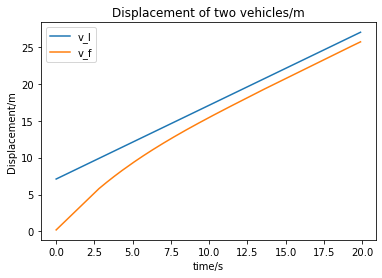

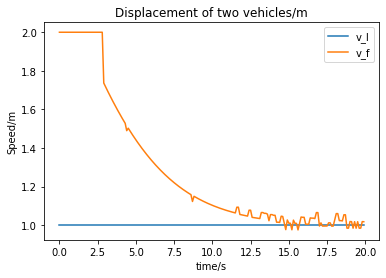

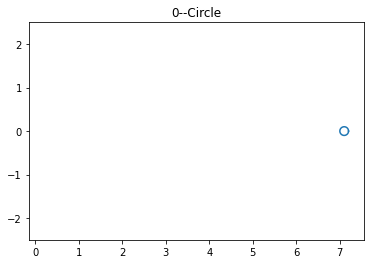

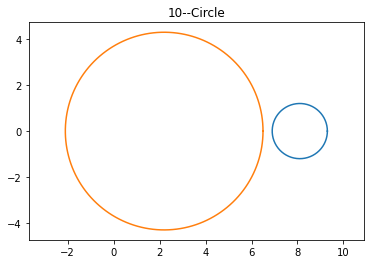

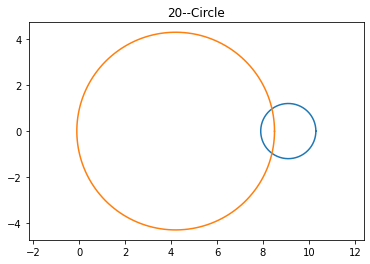

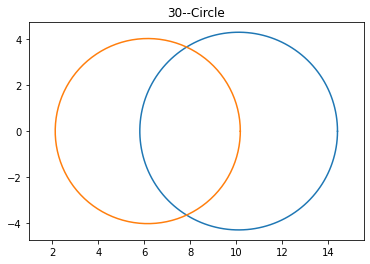

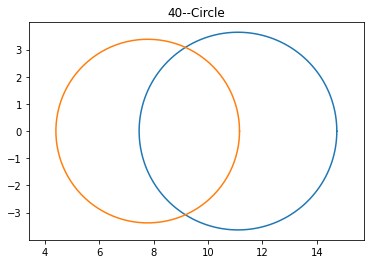

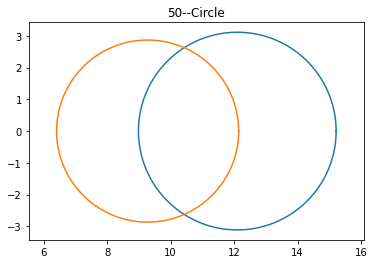

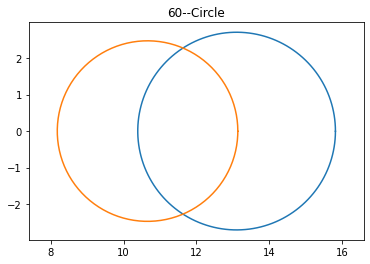

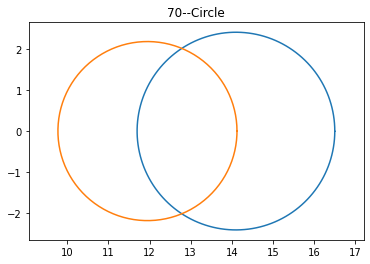

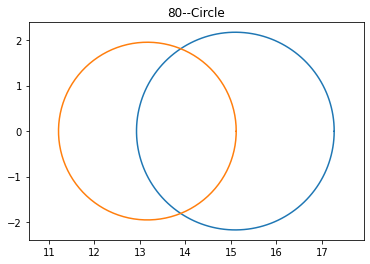

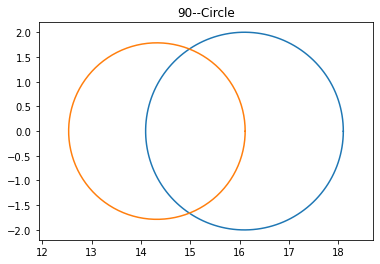

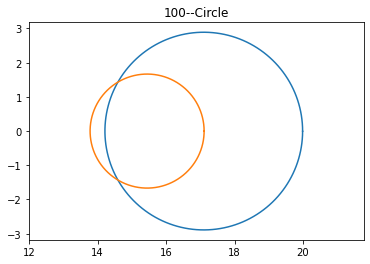

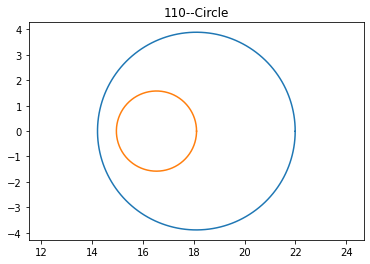

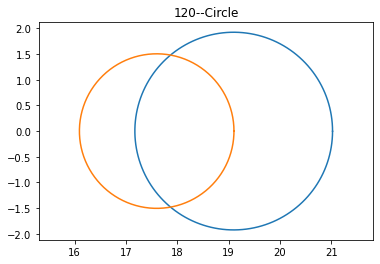

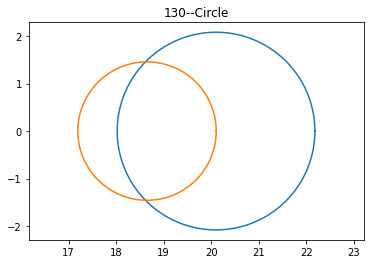

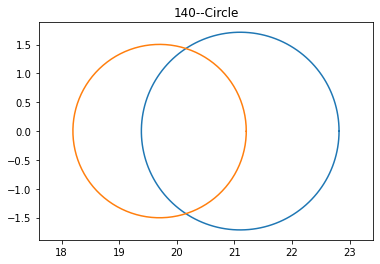

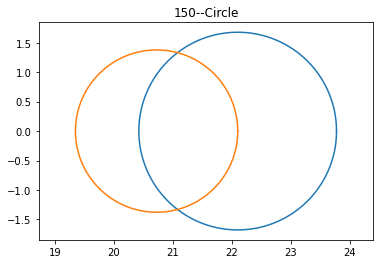

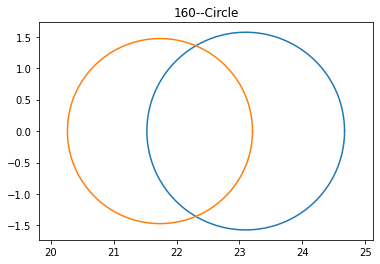

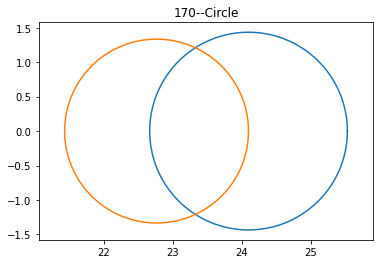

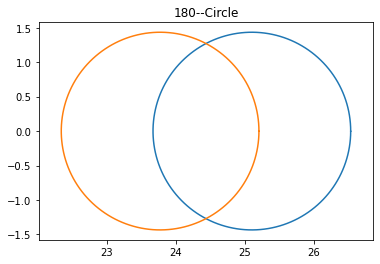

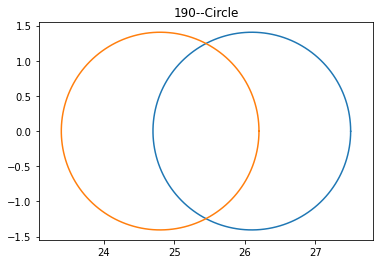

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import time


def plotCircle(plt, a, b, r,i):
    theta = np.arange(0, 2*np.pi,0.02)
    x = a + r*np.cos(theta)
    y = b + r*np.sin(theta)
    # axes = fig.add_subplot(111)
    plt.plot(x,y)
    plt.axis('equal')
    plt.title(str(i)+'--Circle')

# Displacement with time
t = np.arange(aSim.exprStart, aSim.exprEnd, aSim.slotSize)
fig = plt.figure()

for car in aSim.vehicles:
    plt.plot(t, car.traceLoc, label = str(car.id))

plt.xlabel('time/s')
plt.ylabel('Displacement/m')
plt.legend()
plt.title('Displacement of two vehicles/m')
plt.show()


# Speed with time
t = np.arange(aSim.exprStart, aSim.exprEnd, aSim.slotSize)
fig = plt.figure()
for car in aSim.vehicles:
    plt.plot(t, car.traceSpeed, label = str(car.id))

plt.xlabel('time/s')
plt.ylabel('Speed/m')
plt.legend()
plt.title('Displacement of two vehicles/m')
plt.show()


# 绘制出每个时刻两个车的情况
for i in range(0, len(t),10):
    fig = plt.figure()
    for car in aSim.vehicles:
        plotCircle(plt, car.traceLoc[i], 0, car.traceCommR[i],i)
    plt.savefig('./rst/'+str(i)+'example.png')


In [5]:
def func_Rsafe(v_f, v_l, a_f, a_l, dt, rho):
    if(a_f == None):
        return v_f*v_f/2/a_f/rho + v_f*dt
    return v_f*v_f/2/a_f/rho - v_l*v_l/2/a_l + v_f*dt


print(func_Rsafe(2,1,0.5,0.5,0.1,0.5))

# 画一幅图，固定后车的速度，自变量是前车的速度，因变量是安全距离，超参数是安全系数
# 再画一幅图，固定安全系数，自变量是前车速度，因变量是安全距离，超参数是后车速度
v_l = np.arange(0,20,1)
v_f = 20

dist = []
for v in v_l:
    dist.append(func_Rsafe(v_f, v, 0.5, 0.5, 0.1, 0.5))
    


7.2
